# DSC 680 Project 1
## By: Jamie Tran 
## Date: 6/13/2024

### Libraries downloaded:

In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Exploratory data analysis:

In [3]:
#silence future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#importing data
heart_df = pd.read_csv('Heart_Disease_Prediction.csv')
#previewing data
heart_df.head()

,Patient,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,2,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,3,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,4,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,5,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
#filtering data to those with heart diesease
present = heart_df[heart_df['Heart Disease'] == 'Presence']
#previewing dataset
present.head()

,Patient,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
2,3,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
6,7,45,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,8,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,9,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence


In [6]:
#filtering data to those without heart diesease
absent = heart_df[heart_df['Heart Disease'] == 'Absence']
#previewing dataset
absent.head()

,Patient,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,2,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
3,4,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,5,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,6,30,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
10,11,65,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence


In [7]:
#assiging columns to variables for people with heart disease
patient = [present['Patient']]
age = [present['Age']]
sex = [present['Sex']]
cholesterol = [present['Cholesterol']]
pain = [present['Chest pain type']]
bp = [present['BP']]
th = [present['Thallium']]

In [8]:
#assiging columns to variables for people without heart disease
ab_patient = [absent['Patient']]
ab_cholesterol = [absent['Cholesterol']]
ab_pain = [absent['Chest pain type']]
ab_bp = [absent['BP']]
ab_th = [absent['Thallium']]

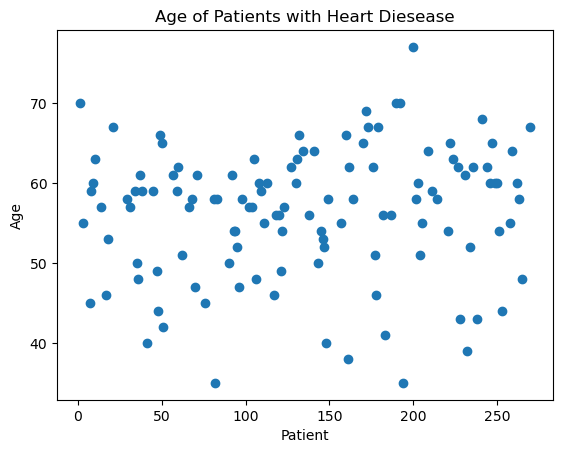

In [9]:
#plotting age of heart disease patients 
plt.scatter(patient, age)
plt.xlabel('Patient')
plt.ylabel('Age')
plt.title('Age of Patients with Heart Diesease')
plt.show()

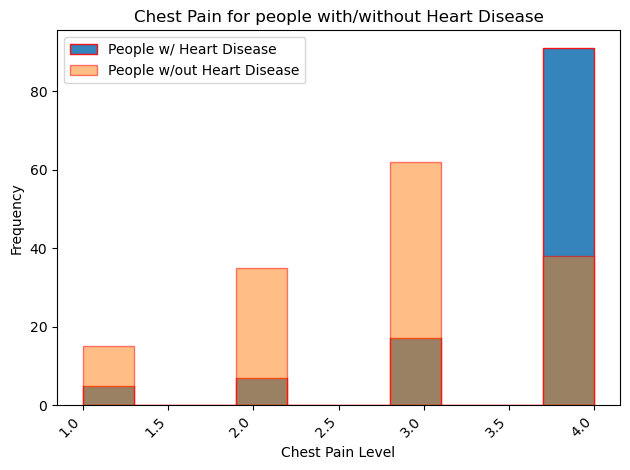

In [10]:
#plotting histogram chart of chest pain for those with and without heart disease.
plt.hist(pain, alpha=.9, edgecolor='red')
plt.hist(ab_pain, alpha=.5, edgecolor='red')
plt.title('Chest Pain for people with/without Heart Disease')
plt.xlabel('Chest Pain Level')
plt.ylabel('Frequency')
plt.legend(['People w/ Heart Disease', 'People w/out Heart Disease'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

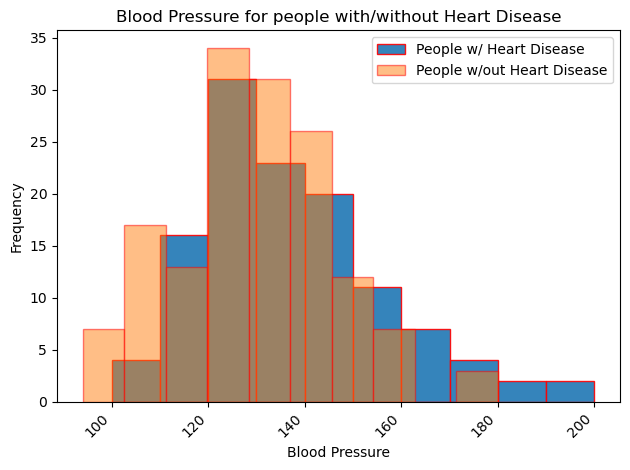

In [11]:
#plotting histogram chart of blood pressure for those with and without heart disease.
plt.hist(bp, alpha=.9, edgecolor='red')
plt.hist(ab_bp, alpha=.5, edgecolor='red')
plt.title('Blood Pressure for people with/without Heart Disease')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend(['People w/ Heart Disease', 'People w/out Heart Disease'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

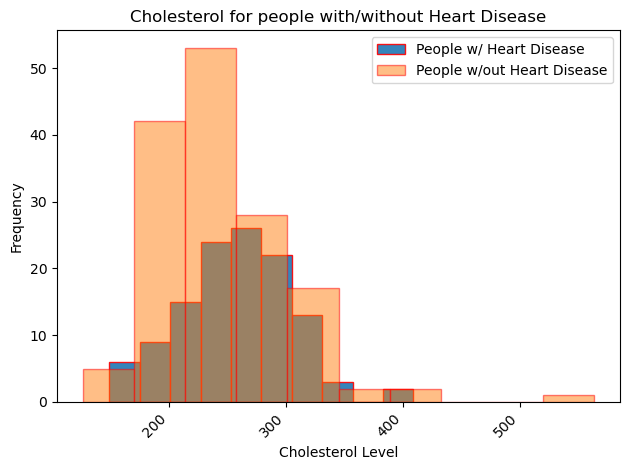

In [27]:
#plotting histogram chart of cholesterol for those with and without heart disease.
plt.hist(cholesterol, alpha=.9, edgecolor='red')
plt.hist(ab_cholesterol, alpha=.5, edgecolor='red')
plt.title('Cholesterol for people with/without Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend(['People w/ Heart Disease', 'People w/out Heart Disease'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

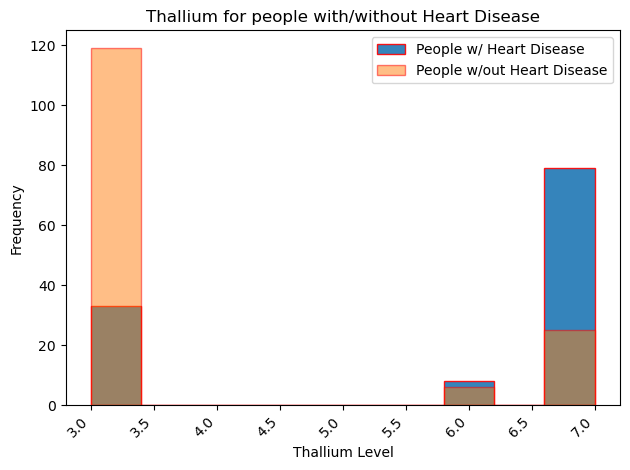

In [13]:
#plotting histogram chart of Thallium for those with and without heart disease.
plt.hist(th, alpha=.9, edgecolor='red')
plt.hist(ab_th, alpha=.5, edgecolor='red')
plt.title('Thallium for people with/without Heart Disease')
plt.xlabel('Thallium Level')
plt.ylabel('Frequency')
plt.legend(['People w/ Heart Disease', 'People w/out Heart Disease'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

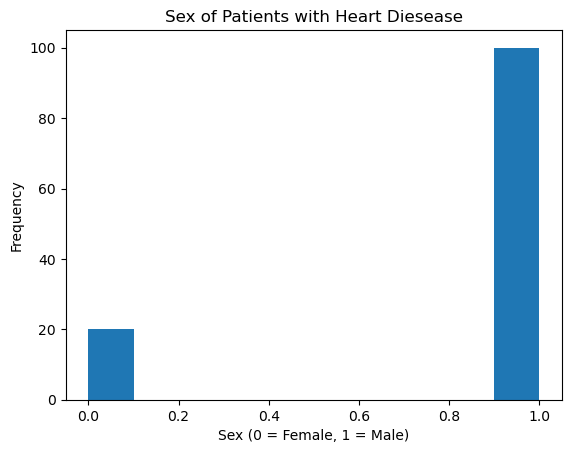

In [14]:
#plotting age of heart disease patients 
plt.hist(sex)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.title('Sex of Patients with Heart Diesease')
plt.show()

### Project code:

In [15]:
#checking for missing values 
heart_df.isna().sum()

Patient                    0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [16]:
#removing unnecessary  columns
final = heart_df.drop(['Patient'], axis = 1)
#previewing data
final.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [17]:
#converting the heart disease column to integers
final['Heart Disease'] = (final['Heart Disease'] == 'Presence').astype(int)
final.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [19]:
#split data with and without heart disease column 
x = final.drop(['Heart Disease'], axis = 1)
y = final['Heart Disease']

In [20]:
#splitting data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
#assigning the model to a variable 
log_regression = LogisticRegression(max_iter = 1000)
#fitting the training data to the model
log_regression.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
test_prediction = log_regression.predict(x_test)

In [23]:
print(classification_report(y_test, test_prediction))
print(confusion_matrix(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54

[[32  1]
 [ 3 18]]
